In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 15.2 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package brown to /Users/suqiulin/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/suqiulin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/suqiulin/nltk_data...
[nltk_data]   Unzipping co

In [1]:
from textblob import TextBlob

In [2]:
import pandas as pd
file_path = '/Users/suqiulin/Desktop/100k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq


In [3]:
def get_sentiment(text):
    return TextBlob(text).polarity

In [4]:
df[['score']] = df['body'].apply(get_sentiment).apply(pd.Series)
df['polarity'] = df['score'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))

df.head(5)

,author,body,created_utc,id,submission,subreddit,subreddit_id,score,polarity
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq,0.250000,pos
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq,0.099150,pos
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq,0.250000,pos
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq,0.098148,pos
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq,0.255682,pos


In [6]:
df = df[['body','id','score','polarity']]
df.to_csv('/Users/suqiulin/Desktop/sentiment_by_textblob.csv', index=False)
print("Sentiment analysis results saved")

Sentiment analysis results saved


In [7]:
df['polarity'].value_counts()

polarity
pos    55182
neu    29137
neg    23402
Name: count, dtype: int64

In [8]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


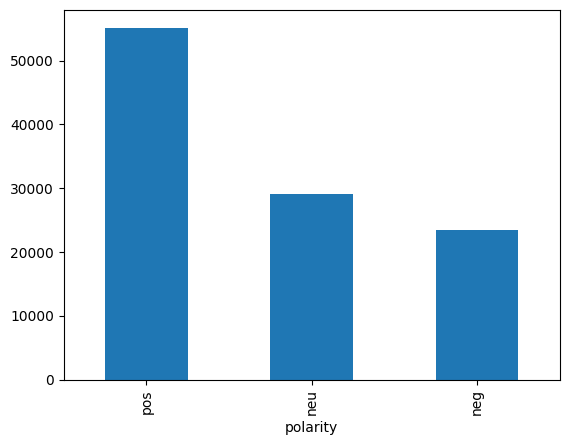

In [9]:
df['polarity'].value_counts().plot(kind='bar')
plt.show()